# The Sparks Foundation - Graduate Rotational Internship Program

## Name : Ausaf Fatima

## Task : Prediction using Decision Tree Algorithm

### Description: Create the Decision Tree Classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Importing the initial libraries required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Setting the style.

In [2]:
sns.set_style('dark')
plt.style.use('seaborn-deep')

Reading the data from the csv file and taking a look at it.

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Id is not needed so lets drop it.

In [5]:
df.drop('Id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Looking at the count of each class in species to see if we are dealing with imbalanced classes.

Text(0.5, 1.0, 'Count of Each Class within Species')

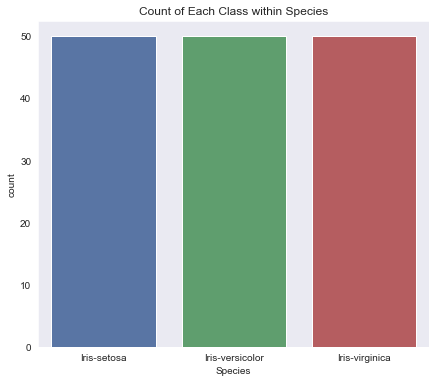

In [8]:
plt.figure(figsize=(7,6))
sns.countplot(df['Species'])
plt.title('Count of Each Class within Species')

The classes are balanced.

Plotting the relationship of each variable with the other.

<Figure size 504x432 with 0 Axes>

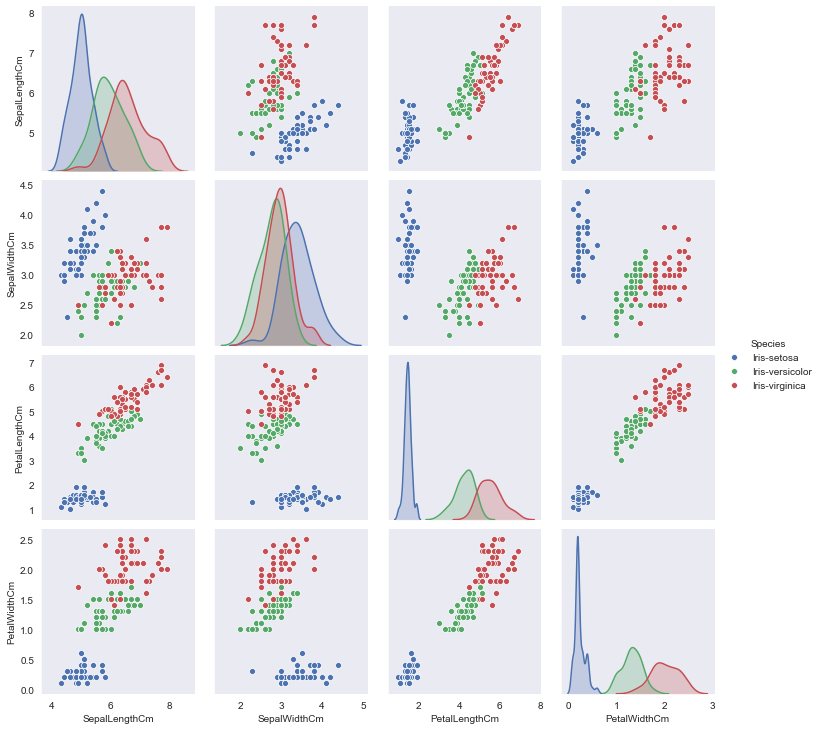

In [9]:
plt.figure(figsize=(7,6))
sns.pairplot(df, hue='Species')

Transforming the categorial target variable into a numerical one.

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
df['Species']= label_encoder.fit_transform(df['Species']) 

In [12]:
df['Species'].unique()

array([0, 1, 2], dtype=int64)

Checking if any outliers are present in the target variable.

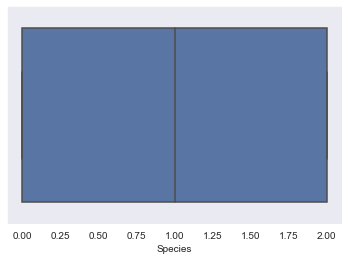

In [13]:
sns.boxplot(df.loc[:, 'Species'])

No outliers are present.

Computing the correlation between the columns and plotting it.

In [14]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


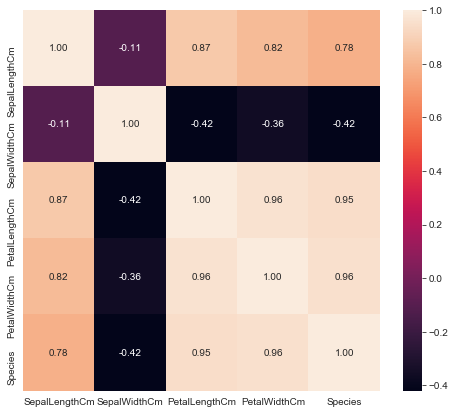

In [15]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Machine Learning:

Splitting the dataset into training and test sets.

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Decision Tree Classifier.

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Performing grid search to choose the optimal values for the parameters of the decision tree.

In [18]:
from sklearn.model_selection import GridSearchCV

grid_values = {'max_depth': [1, 2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]}
grid_clf = GridSearchCV(clf, param_grid = grid_values, cv=5, iid=False)
grid_clf.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 4, 'min_samples_leaf': 2}
Grid best score (accuracy):  0.9560229625447016


Choosing the above optimal values and fitting the model on the training set.

In [19]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=0).fit(X_train, y_train)

Computing the accuracy of the model on the test set.

In [20]:
clf.score(X_test, y_test)

0.9736842105263158

Computing and plotting the confusion matrix.

In [21]:
from sklearn.metrics import confusion_matrix

predicted = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]


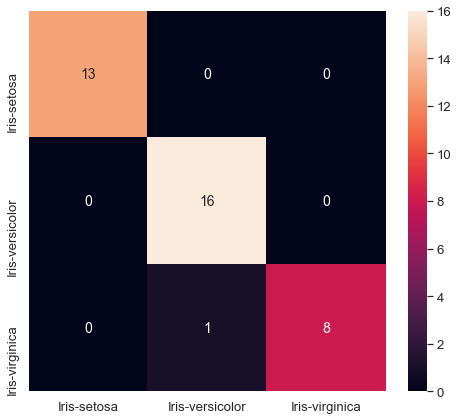

In [22]:
df_cm = pd.DataFrame(matrix, ['Iris-setosa','Iris-versicolor','Iris-virginica'], 
                     ['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.figure(figsize=(8,7))
sns.set(font_scale=1.2) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}) 

plt.show()

Computing the classification report.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



Finally, visualising the fitted decision tree.

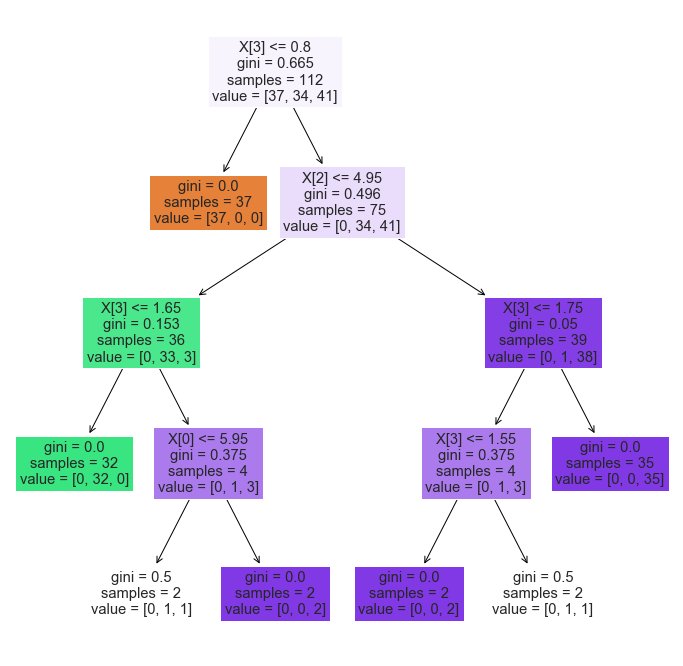

In [24]:
from sklearn import tree

plt.figure(figsize=(12,12))
out = tree.plot_tree(clf, filled = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)